Анализ данных и машинное обучение

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [128]:
# 1.2.5

df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/%D0%92%D1%85%D0%BE%D0%B4%D0%BD%D0%BE%D0%B5%20%D1%82%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5/ping.txt', sep=' ')

df1 = df[["с.1"]]
df1 = df1.rename(columns={'с.1': 'ping'})
df1["ping"] = df1["ping"].str.replace(r"[^\d\.]", "", regex=True)
df1['ping'] = df1['ping'].astype(int)

df1['ping'].min(), df1['ping'].mean().round().astype(int), df1['ping'].max()

(68, 78, 569)

In [142]:
# 2.2.1

df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Python3/titanic_train.csv')
df.loc[:, 'Age'].mean()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
# 2.2.2
h
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [147]:
# 2.3.1

def is_even(n):
    if n % 2 == 0:
        return True
    else:
        return False

In [191]:
# 2.3.2

def is_prime(n):
    if n<4:
        return True
    elif n%2 != 0:
        if n%3 == 0:
            return False
        elif n%n == 0:
            return True
    else:
        return False

In [192]:
# 2.3.3

def perfect(n):
    del_num = 0
    for i in range(1, n):
        if n%i == 0:
            del_num += i
    if del_num == n:
        return True
    else:
        return False

In [199]:
# 2.3.4
lst = [1.67, 16.27, 2.17, 6.31]

lst = list(map(lambda x: int(x), lst))
lst

[1, 16, 2, 6]

In [247]:
# 2.6.3

df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Python3/earthquakes.csv')
df[df['magnitude'] == df['magnitude'].max()]
#df.nlargest(1, columns=['magnitude'])['date']

,date,magnitude
19,05/02/1983 23:42:38,6.7


In [229]:
# 2.6.4

df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Python3/moscow%20schools%20-%20winners.csv')
df.loc[(df['Status']=='победитель') & (df['Subject'] == 'Математика')].Stage.value_counts()

3    268
4     46
Name: Stage, dtype: int64

In [268]:
# 2.10.1

df = np.loadtxt('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Numpy/array.txt')
df = pd.DataFrame(df)
df.iloc[:, 0].mean().astype(int), df.iloc[:, 19].mean().astype(int), df.iloc[:, -1].mean().astype(int)

(49, 49, 50)

In [278]:
# 2.10.2

df = np.load('/home/kir/Загрузки/array2.npy')
df = pd.DataFrame(df)
df.iloc[0, :].mean().astype(int), df.iloc[29, :].mean().astype(int), df.iloc[-1, :].mean().astype(int)

(50, 49, 49)

In [289]:
# 2.10.3

df = np.load('/home/kir/Загрузки/data.npz')
names = df['names']
surnames = df['surnames']
ages = df['ages']

len(np.unique(names))

9

In [295]:
# 2.10.4

df = np.load('/home/kir/Загрузки/data.npz')
names = df['names']
surnames = df['surnames']
ages = df['ages']

ages = pd.DataFrame(ages)
ages = ages.rename(columns={0: 'age'})
ages.query('age>50').count()

age    535
dtype: int64

In [304]:
# 2.10.5

df = np.load('/home/kir/Загрузки/data.npz')
names = df['names']
surnames = df['surnames']
ages = df['ages']

d = {'name': names, 'surname': surnames, 'age': ages}

data = pd.DataFrame(d)
data.query('name=="John" & surname=="Smith" & age<40').count()

name       3
surname    3
age        3
dtype: int64

In [316]:
# 2.12.1

s = pd.Series([1,2,3,4,5])

comm = input()
command = {'count': s.count(), 'mean': s.mean(), 'min': s.min(), 'max': s.max()}
print(command.get(comm))

3.0


In [391]:
# 2.12.2

a = 1
b = 5

s = pd.Series([5,4,1,2,5,2,4,5,5,3,6,7])

idx = s.index
i=0
indexes = list()

for item in s:
    if item>a and item<b:
        indexes.append(idx[i])
    i+=1

print(*indexes)

1 3 5 6 9


In [485]:
# 2.12.3

city = 'Bodaybo'
col = 'population'

cities = pd.DataFrame({
    'area': [294000000.0, 11000000.0, 262900000.0, 280000000.0, np.nan],
    'population': [231994.0, np.nan, 242604.0, 601993.0, 76047.0]    
})
cities.index = ['Angarsk', 'Bodaybo', 'Bratsk', 'Irkutsk', 'Usolye Sibirskoye']

a = pd.DataFrame(cities.loc[[city]][col]).reset_index()
a = a.values
a = a[0]

if pd.isna(a[1])==True:
    print('no data')
else:
    print(*a)

no data


In [489]:
# 2.12.4

df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Python3/titanic_train.csv')
df.Survived.sum()

342

In [555]:
# 2.13.1

df = pd.read_csv('https://github.com/bykov-alexei/data-science-course/blob/master/Pandas/wines.csv?raw=true')
df.query('price == price.max()')['winery']

80290    Château les Ormes Sorbet
Name: winery, dtype: object

In [498]:
# 2.13.2

df.query('country=="Israel"').agg({'description': 'count'})

description    505
dtype: int64

In [501]:
# 2.13.3

df.query('country=="Italy"').agg({'points': 'mean'})

points    88.562231
dtype: float64

In [526]:
# 2.13.4

#df.groupby('country', as_index=False).agg({'description': 'count'}).sort_values(by='description', ascending=False)
df.groupby('country', as_index=False).count().query('description==description.max()')['country'].values

array(['US'], dtype=object)

In [528]:
# 2.13.5

df.groupby('country', as_index=False).count().query('description==109')['country'].values

array(['Uruguay'], dtype=object)

In [544]:
# 2.13.6

#df.query('country=="France"').groupby('province', as_index=False).count().query('description==description.min()')['province'].values
df.loc[df['country'] =="France"].groupby('province', as_index=False).count().query('description==description.min()')['province'].values

array(['Languedoc-Roussillon'], dtype=object)

In [553]:
# 2.13.7

df.groupby(['country', 'province'], as_index=False).agg({'points': 'mean'}).query('points==points.max()').values

array([['Austria', 'Südburgenland', 94.0]], dtype=object)

In [564]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [584]:
# 2.13.8

df.groupby('country', as_index=False).agg({'points': 'max'}).query('points<95').count()

country    29
points     29
dtype: int64

In [587]:
# 2.13.9

df.groupby('taster_name').agg({'points': 'mean'}).idxmin()

points    Alexander Peartree
dtype: object

In [600]:
# 2.13.10

df.loc[df['taster_name']=='Roger Voss'].groupby('country', as_index=False).agg({'points': 'mean'}).sort_values(by='points', ascending=False).values

array([['US', 89.5],
       ['Austria', 89.16371681415929],
       ['South Africa', 89.04545454545455],
       ['France', 88.81813783464143],
       ['Italy', 88.68041237113403],
       ['Portugal', 88.2560975609756],
       ['Greece', 88.0]], dtype=object)

In [602]:
df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Python3/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [610]:
# 2.14.1

word = 'Sir.'
count = 0

for name in df['Name']:
    if word in name:
       count+=1
count

#df['Name'].str.contains('Sir.').value_counts()

1

In [657]:
# 2.14.2

df.query('Name.str.contains("Capt")==True')['Fare']

745    71.0
Name: Fare, dtype: float64

In [664]:
# 2.14.3

#y, m, d = map(int, input('').split())
y = 2021
m = 11
d = 23
pd.Timestamp(year=y, month=m, day=d).day_name()

'Tuesday'

In [708]:
df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Pandas/crime.csv', encoding='windows-1254')
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [678]:
# 2.14.4

df.query('HOUR>=8 & HOUR<9 & OCCURRED_ON_DATE.str.contains("2015-06-15")').count()

INCIDENT_NUMBER        12
OFFENSE_CODE           12
OFFENSE_CODE_GROUP     12
OFFENSE_DESCRIPTION    12
DISTRICT               12
REPORTING_AREA         12
SHOOTING                0
OCCURRED_ON_DATE       12
YEAR                   12
MONTH                  12
DAY_OF_WEEK            12
HOUR                   12
UCR_PART               12
STREET                 12
Lat                    12
Long                   12
Location               12
dtype: int64

In [683]:
# 2.14.5

df.query('HOUR>=6 & HOUR<9 & OCCURRED_ON_DATE.str.contains("2015-06-15")').agg({'INCIDENT_NUMBER': 'count'})

INCIDENT_NUMBER    22
dtype: int64

In [686]:
# 2.14.6

df.query('OFFENSE_CODE_GROUP=="Vandalism" & OCCURRED_ON_DATE.str.contains("2017-01-01")').agg({'INCIDENT_NUMBER': 'count'})

INCIDENT_NUMBER    12
dtype: int64

In [723]:
# 2.14.7

df[['date', 'time']] = df['OCCURRED_ON_DATE'].str.split(' ', expand=True)
df.query('OFFENSE_CODE_GROUP=="Vandalism" & YEAR==2017').groupby('date', as_index=False).count().sort_values(by='INCIDENT_NUMBER', ascending=False)

,date,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,time
124,2017-05-05,30,30,30,30,30,30,0,30,30,30,30,30,30,30,30,30,30,30
123,2017-05-04,28,28,28,28,28,28,0,28,28,28,28,28,28,28,28,28,28,28
44,2017-02-14,28,28,28,28,28,28,0,28,28,28,28,28,28,28,28,28,28,28
45,2017-02-15,28,28,28,28,28,28,0,28,28,28,28,28,28,28,28,28,28,28
135,2017-05-16,27,27,27,27,27,27,0,27,27,27,27,27,27,27,23,23,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2017-03-14,4,4,4,4,4,4,0,4,4,4,4,4,4,3,3,3,4,4
362,2017-12-29,4,4,4,4,4,4,0,4,4,4,4,4,4,4,2,2,4,4
352,2017-12-19,4,4,4,4,4,4,0,4,4,4,4,4,4,4,4,4,4,4
71,2017-03-13,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3


In [725]:
df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Python3/moscow%20schools%20-%20winners.csv')
df.head()

,FullName,ShortName,OlympiadType,Stage,Class,Subject,Status,Year,global_id
0,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,Всероссийская олимпиада,3,11,Иностранный язык (английский язык),призёр,2012/2013,4472939
1,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,Всероссийская олимпиада,3,11,Иностранный язык (английский язык),призёр,2012/2013,4472940
2,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,Всероссийская олимпиада,3,10,Иностранный язык (английский язык),призёр,2012/2013,4472941
3,Государственное бюджетное образовательное учре...,ГБОУ СОШ № 26,Всероссийская олимпиада,4,11,Иностранный язык (английский язык),победитель,2012/2013,4472942
4,Государственное бюджетное образовательное учре...,ГБОУ СОШ № 26,Всероссийская олимпиада,3,11,Иностранный язык (английский язык),призёр,2012/2013,4472943


In [739]:
df.Subject.unique()

array(['Иностранный язык (английский язык)', 'Изобразительное искусство',
       'астрономия', 'Биология', 'Информатика', 'География', 'Subject',
       'Иностранный язык (испанский язык)', 'История', 'Латынь',
       'лингвистика', 'Литература', 'Математика',
       'Мировая Художественная Культура (МХК)', 'Обществознание', 'Право',
       'Иностранный язык (немецкий язык)', 'Технология',
       'Основы безопасности жизнедеятельности', 'предпринимательство',
       'Русский язык', 'Физика', 'Физическая культура', 'филология',
       'Иностранный язык (французский язык)', 'Химия', 'Экология',
       'Экономика', 'Иностранный язык (итальянский язык)',
       'Иностранный язык (китайский язык)', 'Робототехника',
       'Искусство (МХК)',
       'Информатика и Информационно-коммуникационные технологии (ИКТ)',
       'Бюджетная грамотность',
       'Информационные технологии в профессиональной деятельности'],
      dtype=object)

In [730]:
# 2.15.1

df.query('Stage=="4" & Subject=="Математика" & Status=="победитель"').count()

FullName        46
ShortName       46
OlympiadType    46
Stage           46
Class           46
Subject         46
Status          46
Year            46
global_id       46
dtype: int64

In [744]:
# 2.15.2

df.query('Stage=="3" & \
Class=="9" & \
Subject=="Информатика" & \
Status=="призёр"')\
.count()

FullName        349
ShortName       349
OlympiadType    349
Stage           349
Class           349
Subject         349
Status          349
Year            349
global_id       349
dtype: int64

In [748]:
# 2.15.3

df.query('Status=="победитель"').groupby('ShortName', as_index=False).count().sort_values(by='FullName', ascending=False)

,ShortName,FullName,OlympiadType,Stage,Class,Subject,Status,Year,global_id
420,ГБОУ лицей «Вторая школа»,235,235,140,235,235,235,235,235
573,ГБОУ школа № 1329,223,223,141,223,223,223,223,223
1001,ФГБОУ ВПО «МГУ им. М.В. Ломоносова» . СУНЦ МГУ,209,209,140,209,209,209,209,209
872,ГБОУ школа № 57,198,198,137,198,198,198,198,198
7,ГАОУ ВО МИОО. СОШ № 179,196,196,114,196,196,196,196,196
...,...,...,...,...,...,...,...,...,...
794,ГБОУ школа № 2067,1,1,0,1,1,1,1,1
261,ГБОУ СОШ № 775,1,1,0,1,1,1,1,1
792,ГБОУ школа № 2055,1,1,0,1,1,1,1,1
262,ГБОУ СОШ № 79,1,1,0,1,1,1,1,1


In [826]:
df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Pandas/bakery.csv')
df

,TransactionNo,Items,DateTime
0,1,Bread,2016-10-30 09:58:11
1,2,Scandinavian,2016-10-30 10:05:34
2,2,Scandinavian,2016-10-30 10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57
4,3,Jam,2016-10-30 10:07:57
...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58
20503,9682,Tea,2017-09-04 14:32:58
20504,9683,Coffee,2017-09-04 14:57:06
20505,9683,Pastry,2017-09-04 14:57:06


In [756]:
# 2.16.2

df.Items.nunique()

94

In [759]:
# 2.16.3

df.query('Items=="Tea"').count()

TransactionNo    1435
Items            1435
DateTime         1435
dtype: int64

In [765]:
# 2.16.4

df[['date', 'time']] = df['DateTime'].str.split(' ', expand=True)
df.query('date=="2017-05-01"').agg({'TransactionNo': 'nunique'})

TransactionNo    50
dtype: int64

In [802]:
# 2.16.5

df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Pandas/bakery.csv')

df[['date', 'time']] = df['DateTime'].str.split(' ', expand=True)

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
#df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df['weekday'] = df['date'].dt.day_name()
df = df.drop(columns='DateTime')

df.query('weekday=="Monday"').agg({'TransactionNo': 'nunique'})

TransactionNo    1441
dtype: int64

In [795]:
# 2.16.6

df.query('weekday=="Saturday" | weekday=="Sunday"').agg({'TransactionNo': 'nunique'})

TransactionNo    2962
dtype: int64

In [ ]:
df[['date', 'time']] = df['DateTime'].str.split(' ', expand=True)
df = df.drop(columns='DateTime')

df[['year', 'month', 'day']] = df['date'].str.split('-', expand=True)
df = df.drop(columTransactionNons='date')

df.groupby(['month', 'year']).agg({'TransactionNo': 'count'}).sort_values(by='TransactionNo', ascending=False)


In [887]:
# 2.16.7

df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Pandas/bakery.csv')

df['DateTime'] = pd.to_datetime(df.DateTime)
df = df.set_index('DateTime')

month_df = pd.DataFrame(df['TransactionNo'].resample('M').sum())

month_df.sort_values(by='TransactionNo', ascending=False)

,TransactionNo
DateTime,
2017-03-31,23635456
2017-02-28,17346512
2017-01-31,15389842
2016-12-31,7727496
2017-04-30,5076641
2016-11-30,4595265
2017-05-31,3722705
2017-08-31,3660096
2017-07-31,3330463


In [905]:
# 2.16.8

df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Pandas/uber.csv')
df.columns = df.columns.str.lower()
df.head()

,date,time,pick up address
0,7/1/2014,12:00:00 AM,"874 E 139th St Mott Haven, BX"
1,7/1/2014,12:01:00 AM,"628 E 141st St Mott Haven, BX"
2,7/1/2014,12:01:00 AM,"601 E 156th St South Bronx, BX"
3,7/1/2014,12:01:00 AM,"708 E 138th St Mott Haven, BX"
4,7/1/2014,12:02:00 AM,"700 E 140th St Mott Haven, BX"


In [906]:
df['datetime'] = df['date'] + ' ' + df.time
df['datetime'] = pd.to_datetime(df.datetime)
df = df.set_index('datetime').reset_index()
df['datetime'] = pd.to_datetime(df.datetime)
df = df.set_index('datetime')
df.head()

,date,time,pick up address
datetime,,,
2014-07-01 00:00:00,7/1/2014,12:00:00 AM,"874 E 139th St Mott Haven, BX"
2014-07-01 00:01:00,7/1/2014,12:01:00 AM,"628 E 141st St Mott Haven, BX"
2014-07-01 00:01:00,7/1/2014,12:01:00 AM,"601 E 156th St South Bronx, BX"
2014-07-01 00:01:00,7/1/2014,12:01:00 AM,"708 E 138th St Mott Haven, BX"
2014-07-01 00:02:00,7/1/2014,12:02:00 AM,"700 E 140th St Mott Haven, BX"


In [901]:
# 2.16.9

df.groupby(['pick up address']).agg({'pick up address': 'count'}).idxmax()

pick up address     400 Brook Ave Mott Haven, BX
dtype: object

In [902]:
# 2.16.10

df.groupby(['date']).agg({'date': 'count'}).idxmax()

date    9/13/2014
dtype: object

In [907]:
# 2.16.11

week = pd.DataFrame(df['time'].resample('W').count())

week.sort_values(by='time', ascending=False)

,time
datetime,
2014-09-14,7273
2014-09-07,7227
2014-07-20,7155
2014-08-10,7118
2014-08-17,7033
2014-08-03,6977
2014-08-31,6931
2014-09-21,6921
2014-07-13,6884


In [946]:
# 2.16.12

df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Pandas/disruptions.csv')
df.columns = df.columns.str.lower()
df.head()

,event description,year,date event began,time event began,date of restoration,time of restoration,respondent,geographic areas,nerc region,demand loss (mw),number of customers affected,tags
0,Severe Weather - Thunderstorms,2014,6/30/2014,8:00 PM,7/2/2014,6:30 PM,Exelon Corporation/ComEd,Illinois,RFC,Unknown,"420,000","severe weather, thunderstorm"
1,Severe Weather - Thunderstorms,2014,6/30/2014,11:20 PM,7/1/2014,5:00 PM,Northern Indiana Public Service Company,North Central Indiana,RFC,Unknown,"127,000","severe weather, thunderstorm"
2,Severe Weather - Thunderstorms,2014,6/30/2014,5:55 PM,7/1/2014,2:53 AM,We Energies,Southeast Wisconsin,MRO,424,"120,000","severe weather, thunderstorm"
3,Physical Attack - Vandalism,2014,6/24/2014,2:54 PM,6/24/2014,2:55 PM,Tennessee Valley Authority,"Nashville, Tennessee",SERC,Unknown,Unknown,"vandalism, physical"
4,Physical Attack - Vandalism,2014,6/19/2014,8:47 AM,6/19/2014,8:48 AM,Tennessee Valley Authority,"Nashville, Tennessee",SERC,Unknown,Unknown,"vandalism, physical"


In [947]:
df['date event began'] = df['date event began'] + ' ' + df['time event began']
df['date of restoration'] = df['date of restoration'] + ' ' + df['time of restoration']
df = df.drop(columns=['time event began', 'time of restoration'])
df


,event description,year,date event began,date of restoration,respondent,geographic areas,nerc region,demand loss (mw),number of customers affected,tags
0,Severe Weather - Thunderstorms,2014,6/30/2014 8:00 PM,7/2/2014 6:30 PM,Exelon Corporation/ComEd,Illinois,RFC,Unknown,"420,000","severe weather, thunderstorm"
1,Severe Weather - Thunderstorms,2014,6/30/2014 11:20 PM,7/1/2014 5:00 PM,Northern Indiana Public Service Company,North Central Indiana,RFC,Unknown,"127,000","severe weather, thunderstorm"
2,Severe Weather - Thunderstorms,2014,6/30/2014 5:55 PM,7/1/2014 2:53 AM,We Energies,Southeast Wisconsin,MRO,424,"120,000","severe weather, thunderstorm"
3,Physical Attack - Vandalism,2014,6/24/2014 2:54 PM,6/24/2014 2:55 PM,Tennessee Valley Authority,"Nashville, Tennessee",SERC,Unknown,Unknown,"vandalism, physical"
4,Physical Attack - Vandalism,2014,6/19/2014 8:47 AM,6/19/2014 8:48 AM,Tennessee Valley Authority,"Nashville, Tennessee",SERC,Unknown,Unknown,"vandalism, physical"
...,...,...,...,...,...,...,...,...,...,...
972,Line Outages/Switch Fire,2000,6/28/2000 5:52 PM,6/28/2000 7:14:00 PM,Virginia Power/North Carolina Power,Virginia & North Carolina,SERC,175,"30,500","wild fire, transmission interruption"
973,Tripped Lines Fire,2000,6/14/2000 3:54 PM,6/14/2000 5:00:00 PM,Tucson Electric Power,Arizona,WECC,138,"40,911","wild fire, transmission interruption"
974,Transmission Line Loss,2000,3/18/2000 7:08 PM,3/18/2000 7:08:00 PM,Public Service of New Mexico,New Mexico,WECC,"1,040","500,000",transmission interruption
975,Transmission Line Loss,2000,3/18/2000 4:00 PM,3/18/2000 5:10:00 PM,El Paso Elec. Co.,Texas,MAIN,400,"100,000",transmission interruption


In [948]:
df['date event began'] = pd.to_datetime(df['date event began'])
df['date of restoration'] = pd.to_datetime(df['date of restoration'])

df

,event description,year,date event began,date of restoration,respondent,geographic areas,nerc region,demand loss (mw),number of customers affected,tags
0,Severe Weather - Thunderstorms,2014,2014-06-30 20:00:00,2014-07-02 18:30:00,Exelon Corporation/ComEd,Illinois,RFC,Unknown,"420,000","severe weather, thunderstorm"
1,Severe Weather - Thunderstorms,2014,2014-06-30 23:20:00,2014-07-01 17:00:00,Northern Indiana Public Service Company,North Central Indiana,RFC,Unknown,"127,000","severe weather, thunderstorm"
2,Severe Weather - Thunderstorms,2014,2014-06-30 17:55:00,2014-07-01 02:53:00,We Energies,Southeast Wisconsin,MRO,424,"120,000","severe weather, thunderstorm"
3,Physical Attack - Vandalism,2014,2014-06-24 14:54:00,2014-06-24 14:55:00,Tennessee Valley Authority,"Nashville, Tennessee",SERC,Unknown,Unknown,"vandalism, physical"
4,Physical Attack - Vandalism,2014,2014-06-19 08:47:00,2014-06-19 08:48:00,Tennessee Valley Authority,"Nashville, Tennessee",SERC,Unknown,Unknown,"vandalism, physical"
...,...,...,...,...,...,...,...,...,...,...
972,Line Outages/Switch Fire,2000,2000-06-28 17:52:00,2000-06-28 19:14:00,Virginia Power/North Carolina Power,Virginia & North Carolina,SERC,175,"30,500","wild fire, transmission interruption"
973,Tripped Lines Fire,2000,2000-06-14 15:54:00,2000-06-14 17:00:00,Tucson Electric Power,Arizona,WECC,138,"40,911","wild fire, transmission interruption"
974,Transmission Line Loss,2000,2000-03-18 19:08:00,2000-03-18 19:08:00,Public Service of New Mexico,New Mexico,WECC,"1,040","500,000",transmission interruption
975,Transmission Line Loss,2000,2000-03-18 16:00:00,2000-03-18 17:10:00,El Paso Elec. Co.,Texas,MAIN,400,"100,000",transmission interruption


In [928]:
# 2.16.13

#df.groupby([df['date event began'].dt.month, df.year]).agg({'event description': 'count'}).sort_values(by='event description', ascending=False)
df.groupby([df['date event began'].dt.month, df.year]).agg({'event description': 'count'}).idxmax()

event description    (10, 2012)
dtype: object

In [957]:
# 2.16.14

df['repair_time'] = abs(df['date of restoration'] - df['date event began'])
df.groupby([df['date event began'].dt.month, df.year]).agg({'repair_time': 'mean'}).sort_values(by='repair_time', ascending=True)


,,repair_time
date event began,year,
4,2005,0 days 00:08:00
10,2010,0 days 00:11:00
2,2005,0 days 00:17:00
10,2007,0 days 00:25:00
3,2000,0 days 00:35:00
...,...,...
10,2006,6 days 12:55:20
1,2002,9 days 11:30:00
5,2003,11 days 10:20:00


In [959]:
# 2.17.1

df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Pandas/perfomance.csv')
df

,Unnamed: 0,gender,group,test preparation course,math score,reading score,writing score
0,0,female,group B,none,72,72,74
1,1,female,group C,completed,69,90,88
2,2,female,group B,none,90,95,93
3,3,male,group A,none,47,57,44
4,4,male,group C,none,76,78,75
...,...,...,...,...,...,...,...
995,995,female,group E,completed,88,99,95
996,996,male,group C,none,62,55,55
997,997,female,group C,completed,59,71,65
998,998,female,group D,completed,68,78,77


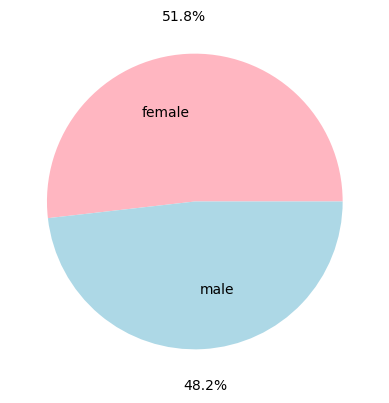

In [992]:
# 2.17.2

df.gender.value_counts()

le = LabelEncoder()
le.fit(df.gender)
df.gender = le.transform(df.gender)

plt.pie(df.gender.value_counts(), 
        labels = ['female', 'male'], 
        colors=['lightpink', 'lightblue'],
        autopct='%1.1f%%',
        pctdistance=1.25, labeldistance=.6)
plt.show()

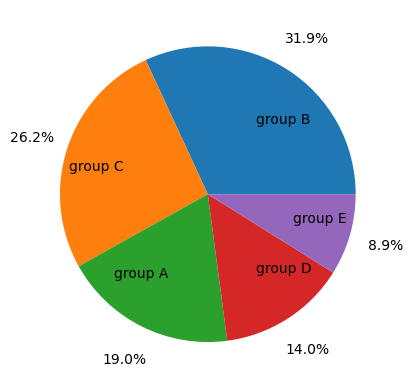

In [999]:
# 2.17.3

plt.pie(df.group.value_counts(), 
        labels=['group B', 'group C', 'group A', 'group D', 'group E'],
        autopct='%1.1f%%',
        pctdistance=1.25, labeldistance=.6)
plt.show()

<Axes: xlabel='test preparation course'>

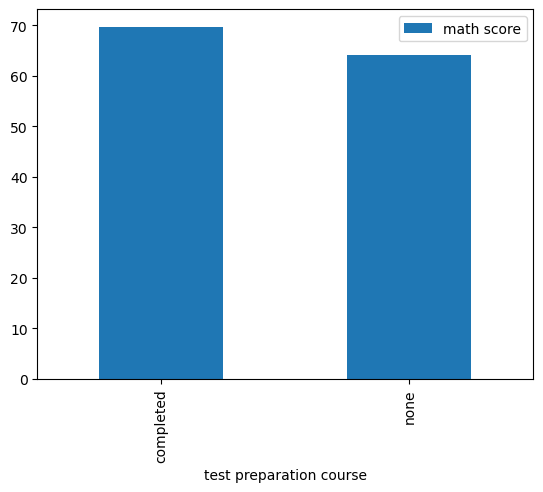

In [1027]:
# 2.17.4

#pandas barplot

df.groupby('test preparation course').agg({'math score': 'mean'}).plot.bar()

<Axes: xlabel='test preparation course', ylabel='math score'>

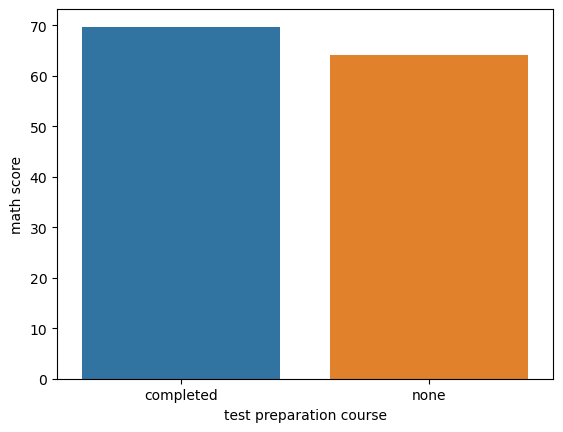

In [1037]:
# seaborn 

sns.barplot(data=df.groupby('test preparation course', as_index=False).agg({'math score': 'mean'}), 
            x='test preparation course', 
            y='math score')

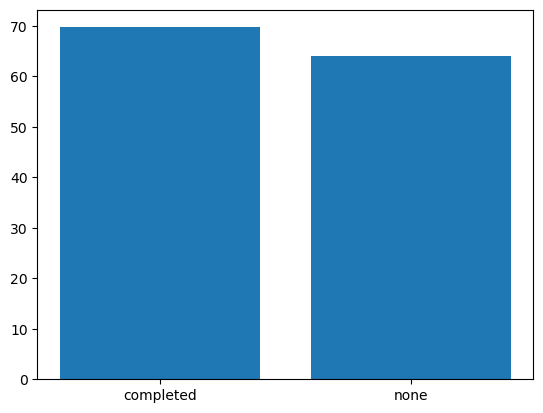

In [1054]:
# matplotlib

fig, ax = plt.subplots()
mathscore = df.groupby('test preparation course', as_index=False).agg({'math score': 'mean'})
ax.bar(mathscore['test preparation course'], mathscore['math score'])
plt.show()

<Axes: xlabel='test preparation course'>

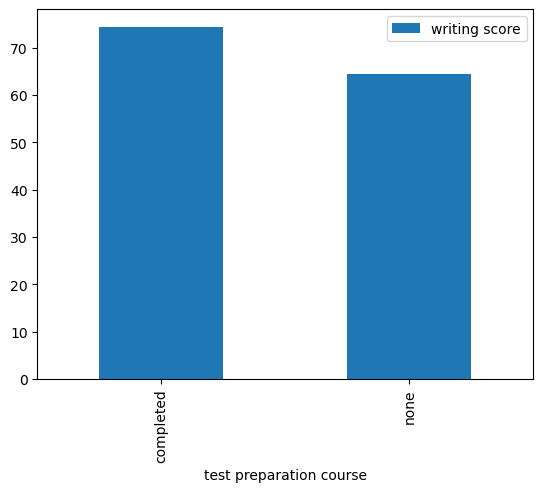

In [1057]:
# 2.17.5

df.groupby('test preparation course').agg({'writing score': 'mean'}).plot.bar()

<Axes: xlabel='math score', ylabel='reading score'>

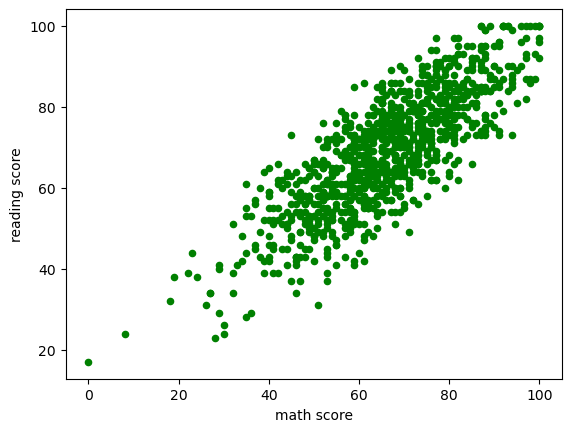

In [1073]:
# 2.17.6

#math score reading score writing score

df.plot.scatter(x='math score', y='reading score', c='green')

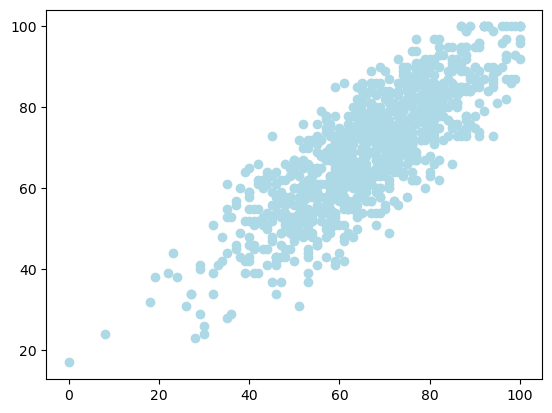

In [1080]:
#math score reading score writing score

x = df['math score']
y = df['reading score']

plt.scatter(x, y, c='lightblue')
plt.show()

In [1086]:
# 2.17.7

import plotly.express as px

fig = px.scatter_3d(df, x='math score', y='reading score', z='writing score', color='test preparation course')
fig.show()


In [3]:
# 3.4.2

df = pd.read_csv('https://raw.githubusercontent.com/bykov-alexei/data-science-course/master/Pandas/app_store_reviews.csv')
df.isna().sum()
df.head()


,date,userName,title,rating,isEdited,review,crawled_at,url,app_id,country,app_name,_id,developerResponse
0,2017-09-08 11:58:17,Mika 👽,Dieser nervige Button 😂,5,False,"Sehr gute App, erfüllt Ihren Zweck. Finde so g...",2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,32f9ec7e-74de-578d-acf6-48d4182cae60,NaN
1,2017-09-06 15:32:26,Bilux1,Super App,5,False,Bester Messenger Dienst,2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,f89a85f6-437e-53f4-acd0-adda3ae5ab2e,NaN
2,2021-01-08 22:31:30,Leberkasbepi,Tschüss,1,False,"Wegen den neuen Richtlinien, werd ich WhatsApp...",2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,65adfbd9-dbab-5ba8-8d40-d84dc7e8f515,NaN
3,2019-01-15 12:18:55,1an--na1,Gehört jzt zu facebook,1,False,Furchtbare datenschutzpolitik,2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,da48ad1c-3977-5e9d-8d74-c84f62ec1830,NaN
4,2020-05-24 13:51:44,Bykslmddislnsvsj,.,4,False,Wäre org wenn’s eine Abstimmungs-Funktion für ...,2021-02-21 10:15:43,https://apps.apple.com/at/app/whatsapp-messeng...,310633997,at,whatsapp-messenger,eefd7e92-a6d2-55de-b14b-b00002fa8380,NaN


In [4]:
# 3.4.3

df.query('app_name=="whatsapp-messenger" & rating==5').count()

date                 4504
userName             4504
title                4504
rating               4504
isEdited             4504
review               4504
crawled_at           4504
url                  4504
app_id               4504
country              4504
app_name             4504
_id                  4504
developerResponse       7
dtype: int64

In [5]:
# 3.4.4

df[df['app_name']=='talking-tom-cat-2'].agg({'rating': 'mean'})

rating    4.623683
dtype: float64

In [12]:
# 3.4.5

df['developerResponse'].nunique()

51

In [16]:
# 3.4.6

df.groupby('app_name').agg({'rating': 'mean'}).idxmax()

rating    talking-tom-cat-2
dtype: object

In [22]:
# 3.4.7

items = df['review'].count()
items

for i in range(0, items):
    

SyntaxError: incomplete input (187229218.py, line 7)

In [ ]:
# 3.4.8



In [25]:
# 3.4.9

df['crawled_at'].min()

'2021-02-20 23:53:35'

In [29]:
# 3.4.10

df.groupby('crawled_at').count().idxmax()

date                 2021-02-21 10:15:44
userName             2021-02-21 10:15:44
title                2021-02-21 10:15:44
rating               2021-02-21 10:15:44
isEdited             2021-02-21 10:15:44
review               2021-02-21 10:15:44
url                  2021-02-21 10:15:44
app_id               2021-02-21 10:15:44
country              2021-02-21 10:15:44
app_name             2021-02-21 10:15:44
_id                  2021-02-21 10:15:44
developerResponse    2021-02-21 10:15:43
dtype: object

In [32]:
# 3.4.11

df[df['app_name']=='talking-tom-cat-2'].agg({'rating': 'median'})

rating    5.0
dtype: float64

In [44]:
# 4.1.1 линейная регрессия

y_true = np.load('/home/kir/Загрузки/first-series.npy')
y_pred = np.load('/home/kir/Загрузки/second-series.npy')


sk.metrics.mean_squared_error(y_true, y_pred)

489.1618273504579

In [45]:
# 4.1.2

sk.metrics.mean_squared_error(y_true, y_pred, squared=False)

22.117003127694716

In [49]:
# 4.1.3

from sklearn.metrics import mean_absolute_error

sk.metrics.mean_absolute_error(y_true, y_pred)

17.996466944603256

In [4]:
# 4.1.4

from sklearn.linear_model import LinearRegression

df = np.load('/home/kir/Загрузки/data(1).npz')
X = df['years'].reshape(-1,1)
y = df['prices']

reg = LinearRegression() 
reg.fit(X, y)

reg.coef_

array([2.34704228])

In [101]:
 # 4.2.1 линейная множественная регрессия
    
import math
    
df = np.load('/home/kir/Загрузки/data(3).npz')
X = df['x'].reshape(-1,1)
y = df['y']

X = pd.DataFrame(X)
X = X.rename(columns={0: 'x'}).astype(float)
X['sinx'] = X.apply(lambda x: math.sin(x), axis=1)
X['cosx'] = (1 - (X.sinx)**2)**(0.5)
X = X.drop(columns=['x'])

reg = LinearRegression()
reg.fit(X_train, y)

reg.coef_, reg.intercept_

(array([1.99580071, 0.01163821]), 2.983112046241359)

In [82]:
# 4.2.2

import math
    
df = np.load('/home/kir/Загрузки/task2.npz')
X = df['x']
y = df['y']


X = pd.DataFrame(X)
X = X.rename(columns={0: 'x'}).astype(float)
X['sinx'] = X.apply(lambda x: math.sin(x), axis=1)
X = X[['sinx', 'x']]
X['x2'] = X.x * X.x

reg = LinearRegression()
reg.fit(X, y)

reg.coef_, reg.intercept_

(array([48.30709805,  1.94323738,  7.02449833]), 249.5768714533963)

In [102]:
# 4.2.3
    
df = np.load('/home/kir/Загрузки/task3.npz')
X = df['x']
y = df['y']

X = pd.DataFrame(X)
X = X.rename(columns={0: 'x'}).astype(float)
X['sinx'] = X.apply(lambda x: math.sin(x), axis=1)
X = X[['sinx', 'x']]
X['x2'] = X.x * X.x

reg = LinearRegression()
reg.fit(X, y)

a = reg.coef_
a = np.append(a, reg.intercept_)

def func(x):
    return round(a[0]*math.sin(x) + a[1]*x + a[2]*(x**2) + a[3])

func(21), func(22), func(50), func(-20)

(163, 167, 724, 53)

In [122]:
# 4.3.1 классификация метрики

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = np.load('/home/kir/Загрузки/predictions.npz')

y_pred = df['y_pred']
y_true = df['y_true']

accuracy_score(y_true, y_pred)*100

89.4

In [123]:
# 4.3.2

precision_score(y_true, y_pred)*100

89.4

In [124]:
# 4.3.3

recall_score(y_true, y_pred)*100

100.0

In [126]:
# 4.3.4

f1_score(y_true, y_pred)*100

94.40337909186906

In [140]:
# 4.4.1 классификация деревья решений

from sklearn.tree import DecisionTreeClassifier

df = np.load('/home/kir/Загрузки/train_data.npz')
X = df['x']
y = df['y']
X_test = df['x_test']

clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X, y)

clf.predict(X_test)

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [143]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier()
clf.fit(X, y)

clf.predict(X_test)

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [8]:
# 4.7 классификация картинок

import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


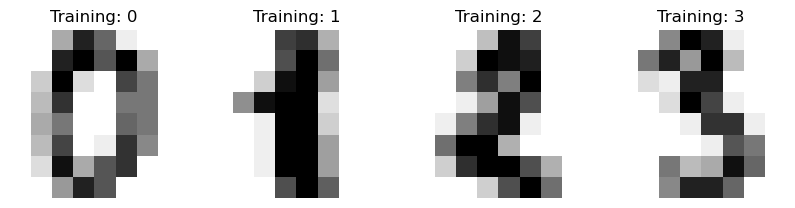

In [7]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [18]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

clf = svm.SVC(gamma=0.001)

x_train, x_test, y_train , y_test = train_test_split(data, 
                                                        digits.target, 
                                                        test_size=0.5, 
                                                        shuffle=False)

clf.fit(x_train, y_train)

predicted = clf.predict(x_test)

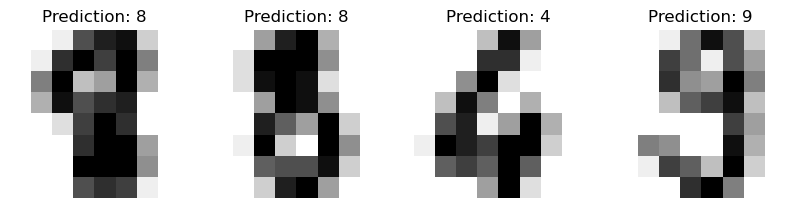

In [21]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [25]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [39]:
# 4.8.1 классификация текста и наивный байес

txt = 'Hello how are You Are you ok Good'

dct = dict()

for key in txt.lower().split():
    dct[key] = dct.setdefault(key, 0) + 1
    
S = "jingle bells jingle bells jingle all the way"
>>> L = S.split()
>>> U = set(L)
>>> M = {}
>>> for word in U:
...   M[word] = L.count(word)


SyntaxError: can't use starred expression here (1263184259.py, line 10)